In [29]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import matplotlib.colors as mcolors

In [30]:

log_dfs = list()
for job_id in range(7):
    job_log_dfs = list()
    job_dir = Path("../data/221/logs/{}".format(job_id))

    for log_file in job_dir.glob("*.csv"):
        log_df = pd.read_csv(log_file, index_col=0)
        log_df["delta_0"] = log_df["xyz_0"] - log_df.loc[0, "xyz_0"]
        log_df["delta_1"] = log_df["xyz_1"] - log_df.loc[0, "xyz_1"]
        log_df["delta_2"] = log_df["xyz_2"] - log_df.loc[0, "xyz_2"]
        job_log_dfs.append(log_df)

    log_dfs.append(job_log_dfs)

print(len(log_dfs))

7


In [3]:
log_dfs[1][0].head()

,step,time,ff,xray_7mhl,r_free_7mhl,r_work_7mhl,rmsd_7mhl,w_0_7mhl,pdb,copy,...,lin_vel_0,lin_vel_1,lin_vel_2,vel_mag,dxray_mag,dcharmm_mag,temp,delta_0,delta_1,delta_2
0,0.0,0.000001,-293.521441,5.337249,0.313378,0.317044,0.000000,1.0,/wynton/group/sali/mhancock/xray/sample_bench/...,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000461,1.668750,NaN,0.000000,0.000000,0.000000
1,1.0,4.145663,-108.158767,5.338143,0.314080,0.317316,0.015095,1.0,NaN,0.0,...,-0.002163,-0.001924,0.003440,0.006611,0.000459,13.805529,275.245566,-0.004581,-0.003711,0.007060
2,2.0,6.332793,289.582474,5.339549,0.314842,0.317779,0.028516,1.0,NaN,0.0,...,-0.001797,-0.002045,0.003165,0.005873,0.000458,23.777069,221.788017,-0.008650,-0.007696,0.013759
3,3.0,8.557188,589.622526,5.341123,0.315533,0.318407,0.039122,1.0,NaN,0.0,...,-0.001263,-0.002057,0.002734,0.005238,0.000457,27.708368,180.583126,-0.011768,-0.011890,0.019721
4,4.0,10.691258,645.982815,5.342892,0.316480,0.319078,0.046669,1.0,NaN,0.0,...,-0.000673,-0.001804,0.002213,0.005105,0.000454,25.562216,171.478107,-0.013703,-0.015926,0.024696


In [4]:
log_dfs[1][0].tail()

,step,time,ff,xray_7mhl,r_free_7mhl,r_work_7mhl,rmsd_7mhl,w_0_7mhl,pdb,copy,...,lin_vel_0,lin_vel_1,lin_vel_2,vel_mag,dxray_mag,dcharmm_mag,temp,delta_0,delta_1,delta_2
3395,3395.0,8675.598485,603.593887,5.580834,0.542049,0.558309,3.345249,1.0,NaN,0.0,...,0.002296,-0.002218,0.004108,0.005338,0.000021,21.709754,176.114873,2.338517,-0.116161,-1.501298
3396,3396.0,8677.939721,612.203412,5.580842,0.542228,0.558337,3.345566,1.0,NaN,0.0,...,0.002781,-0.003008,0.002507,0.005316,0.000022,21.941406,174.970616,2.344031,-0.121566,-1.494695
3397,3397.0,8680.327842,627.148360,5.580847,0.542213,0.558342,3.345928,1.0,NaN,0.0,...,0.002362,-0.003417,0.001106,0.005285,0.000022,22.304085,172.978844,2.349642,-0.128193,-1.491270
3398,3398.0,8682.672967,635.075874,5.580957,0.542667,0.558341,3.346356,1.0,NaN,0.0,...,0.001075,-0.003439,0.000193,0.005264,0.000022,22.410657,171.898517,2.353477,-0.135235,-1.490272
3399,3399.0,8685.011047,631.204136,5.580967,0.542809,0.558371,3.346859,1.0,NaN,0.0,...,-0.000852,-0.003138,-0.000098,0.005269,0.000023,22.248904,172.384603,2.353941,-0.141950,-1.490496


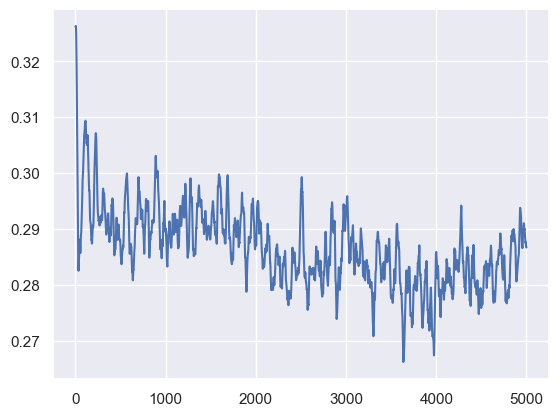

In [6]:
plt.plot(log_dfs[5][7].index, log_dfs[5][7]["r_free_7mhl"])

In [15]:
log_dfs[5][7].loc[4990, "ff"]

1639.6315426485571

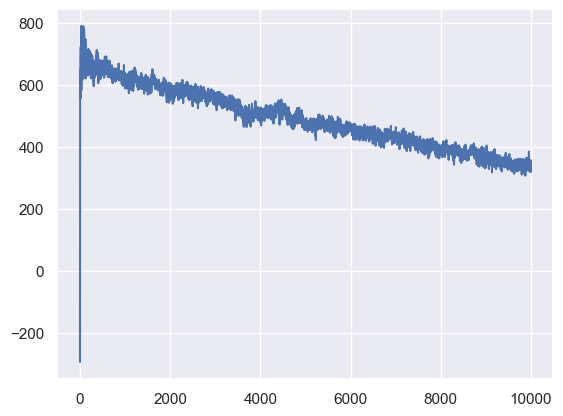

In [38]:
log_df = log_dfs[0][0]
plt.plot(log_df.index[:], log_df['ff'][:])

plt.savefig(Path(Path.home(), "Desktop/plot.png"))

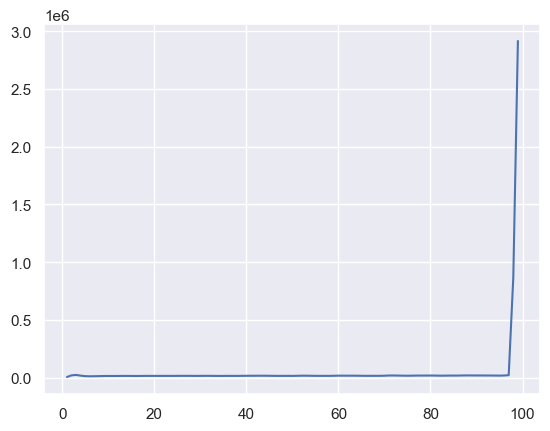

In [34]:
plt.plot(log_df.index[:], log_df['temp'][:])

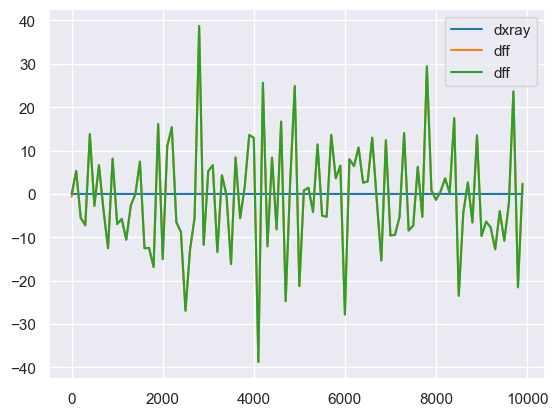

In [141]:
start, end, offset = 0, len(log_df), 100

log_df = log_dfs[0]
plt.plot(log_df["step"][start:end:offset], log_df["dxray_dx_2"][start:end:offset], c="tab:blue", label="dxray")
plt.plot(log_df["step"][start:end:offset], log_df["dcharmm_dx_2"][start:end:offset], c="tab:orange", label="dff")
plt.plot(log_df["step"][start:end:offset], log_df["dxyz_2"][start:end:offset], c="tab:green", label="dff")

# for term in ["charmm", "bnd", "ang", "dih", "imp", "nbd"]:
#     plt.plot(log_df["step"][start:end], log_df["d{}_dx_0".format(term)][start:end], label=term, alpha=0.5)

plt.legend()
plt.savefig(Path(Path.home(), "Desktop/plot.png"))

In [142]:
for i in range(3):
    print(np.mean(log_df["dxyz_{}".format(i)]))

-0.0006919751637927149
0.014214328212618421
0.005257974148072639


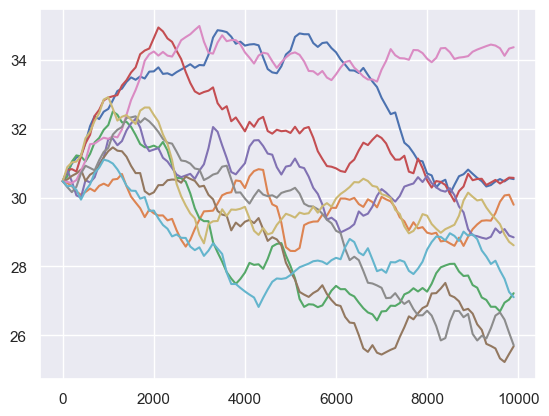

In [143]:
for i in range(10):
    log_df = log_dfs[i]
    plt.plot(log_df["step"][start:end:offset], log_df["xyz_2"][start:end:offset])
    plt.savefig(Path(Path.home(), "Desktop/plot.png"))


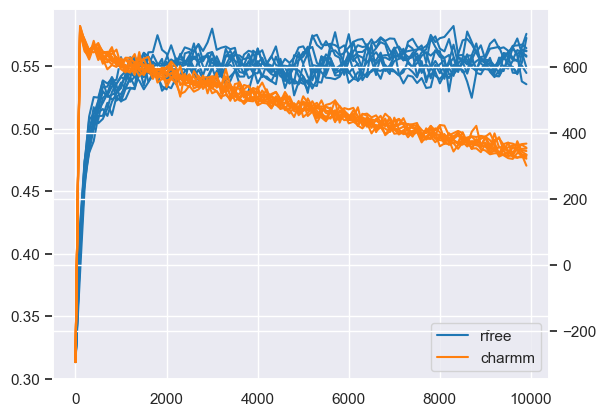

In [146]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

for log_df in log_dfs:
    ln1 = ax1.plot(log_df["step"][start:end:offset], log_df["r_free_7mhl"][start:end:offset], c="tab:blue", label="rfree")
    ln2 = ax2.plot(log_df["step"][start:end:offset], log_df["ff"][start:end:offset], c="tab:orange", label='charmm')

lns = ln1+ln2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)
plt.savefig(Path(Path.home(), "Desktop/plot.png"))



In [21]:
log_dfs[5][0].columns

Index(['step', 'time', 'ff', 'xray_7mhl', 'r_free_7mhl', 'r_work_7mhl',
       'rmsd_7mhl', 'w_0_7mhl', 'pdb', 'copy', 'dxray_dx_0', 'dxray_dx_1',
       'dxray_dx_2', 'dcharmm_dx_0', 'dcharmm_dx_1', 'dcharmm_dx_2', 'dxyz_0',
       'dxyz_1', 'dxyz_2', 'xyz_0', 'xyz_1', 'xyz_2', 'com_delta_0',
       'com_delta_1', 'com_delta_2', 'com_delta_mag', 'lin_vel_0', 'lin_vel_1',
       'lin_vel_2', 'vel_mag', 'dxray_mag', 'dcharmm_mag', 'temp', 'delta_0',
       'delta_1', 'delta_2'],
      dtype='object')

In [22]:
len(log_dfs)

8

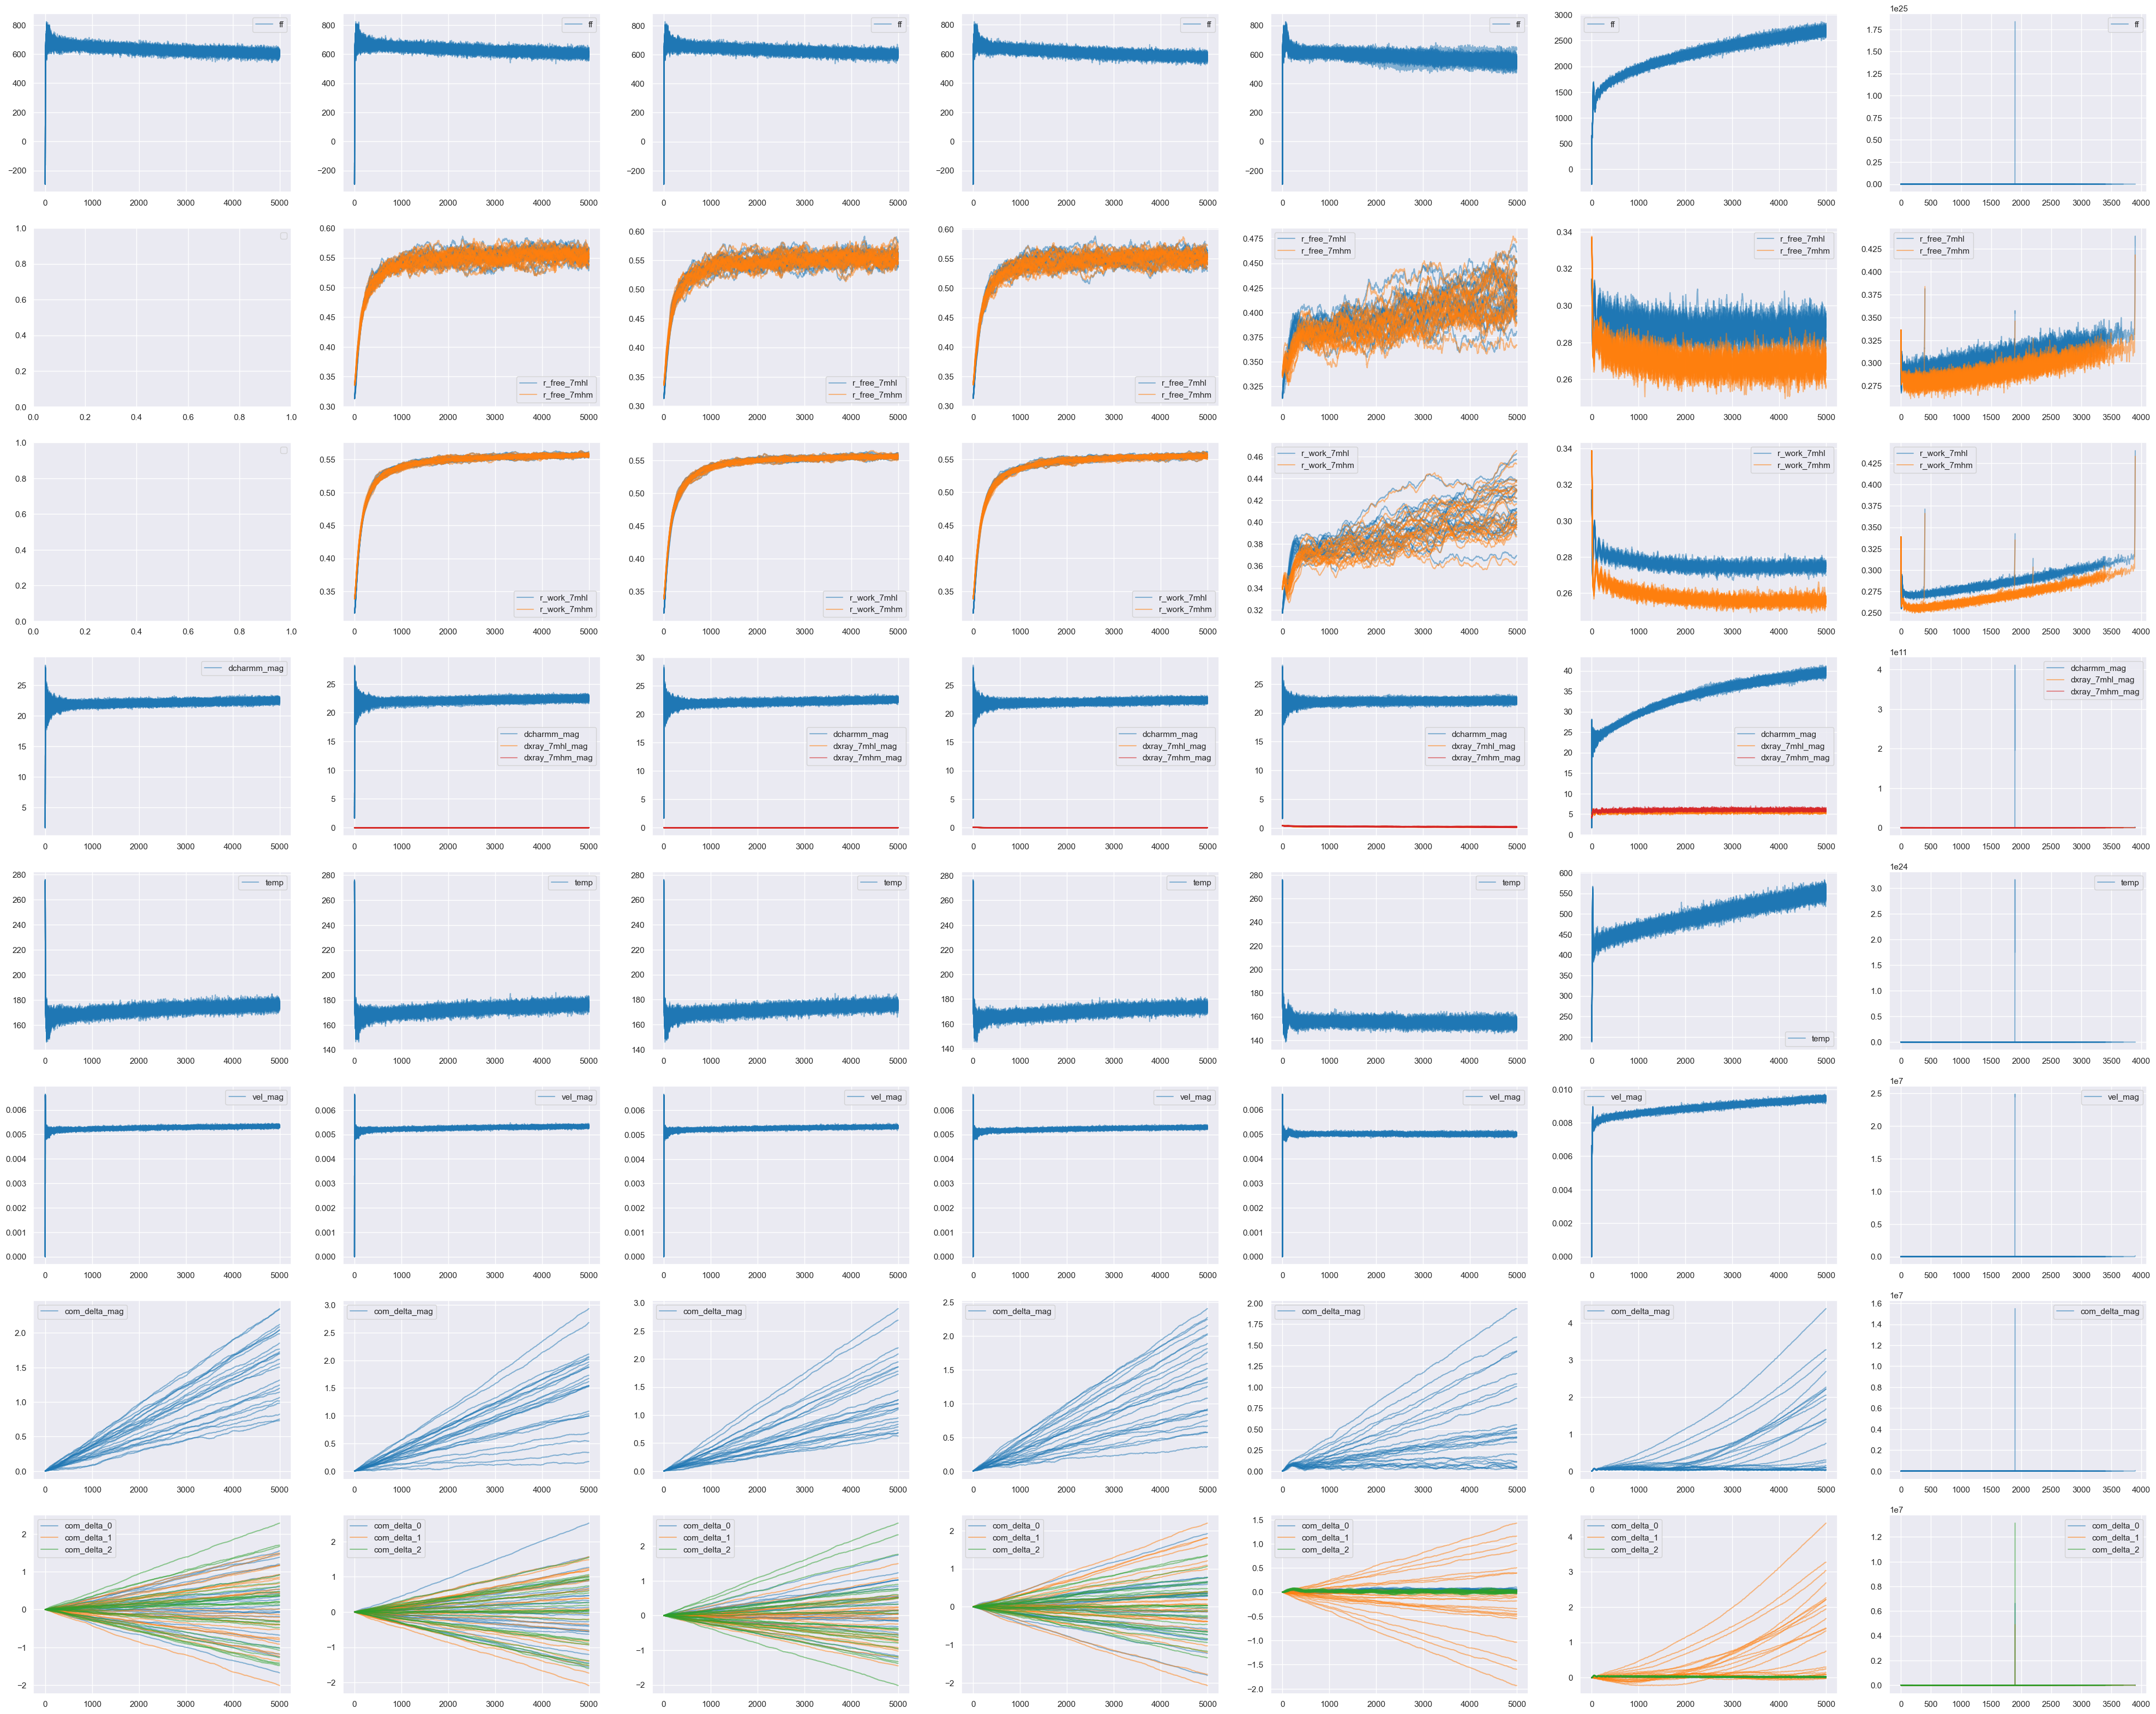

In [36]:
all_fields = [["ff"], ["r_free_7mhl", "r_free_7mhm"], ["r_work_7mhl", "r_work_7mhm"], ["dcharmm_mag", "dxray_7mhl_mag", "dxray_7mhm_mag"], ["temp"], ["vel_mag"], ["com_delta_mag"], ["com_delta_0", "com_delta_1", "com_delta_2"]]
all_colors = [["tab:blue"], ["tab:blue", "tab:orange"], ["tab:blue", "tab:orange"], ["tab:blue", "tab:orange", "tab:red"], ["tab:blue"], ["tab:blue"], ["tab:blue"], ["tab:blue", "tab:orange", "tab:green"]]
twins = [False, False, False, False, False, False, False, False]

fig, axs = plt.subplots(len(all_fields),len(log_dfs), figsize=(50, 5*len(all_fields)))
start, end, offset = 0, 100000, 1

for i in range(len(all_fields)):
    fields = all_fields[i]
    colors = all_colors[i]
    for job_id in range(len(log_dfs)):
        ax1 = axs[i][job_id]
        job_log_dfs = log_dfs[job_id]
        twin = twins[i]

        lns = list()
        for j in range(len(fields)):
            if twin and j > 0:
                ax = ax1.twinx()
            else:
                ax = ax1
            field = fields[j]
            color = colors[j]

            for log_df in job_log_dfs:
                if field in log_df.columns:
                    ln = ax.plot(log_df["step"][start:end:offset], log_df[fields[j]][start:end:offset], c=colors[j], label=fields[j], alpha=0.5)

            if field in log_df.columns:
                lns.extend(ln)

        labs = [l.get_label() for l in lns]
        ax1.legend(lns, labs)

plt.savefig(Path(Path.home(), "Desktop/plot.png"))

In [100]:
# for i in range(1,54):
#     log_df = pd.read_csv(Path("../data/213/logs/{}/0.csv".format(i)), index_col=0)
#     plt.plot(log_df["step"][start:100], log_df["r_free_7mhl"][start:100], c="tab:orange")

# for i in range(10):
#     log_df = pd.read_csv(Path("../data/202/logs/13/{}.csv".format(i)), index_col=0)
#     plt.plot(log_df["step"][:100], log_df["r_free_7mhl"][:100], c="tab:blue", label="1E5")

# plt.savefig(Path(Path.home(), "Desktop/plot.png"))
